This is the assignment of Machine Learning Foundation 2016, given by Prof. Hsuan-Tien Lin, Dept. of CSIE, NTU

[Original link](https://www.csie.ntu.edu.tw/~htlin/course/mlfound16fall/hw2)

### Decision Stump Algorithm
In class, we taught about the learning model of "positive and negative rays" (which is simply one-dimensional perceptron) for one-dimensional data. The model contains hypotheses of the form: 

$$h_{s,\theta}(x) = s \bullet sign(x-\theta)$$

The model is frequently named the "decision stump" model and is one of the simplest learning models. As shown in class, for one-dimensional data, the VC dimension of the decision stump model is $2$. In fact, the decision stump model is one of the few models that we could easily minimize $E_{in}$ for binary classification efficiently by enumerating all possible thresholds. In particular, for $N$ examples, there are at most $2N$ dichotomies (see page 22 of class05 slides), and thus at most $2N$ dfferent $E_{in}$ values. We can then easily choose the dichotomy that leads to the lowest $E_{in}$, where ties can be broken by randomly choosing among the lowest-$E_{in}$ ones. The chosen dichotomy stands for a combination of some 'spot' (range of $\theta$) and $s$, and commonly the median of the range is chosen as the $\theta$ that realizes the dichotomy. 
In this problem, you are asked to implement such and algorithm and run your program on an artificial data set. First of all, start by generating a one-dimensional data by the procedure below: 
1. Generate $x$ by a uniform distribution in $[-1,1]$. 
4. Generate $y$ by $\tilde{s}(x)$ + noise where $\tilde{s}(x) = sign(x)$ and the noise flips the result with 20% probability.

<ol start="16">
  <li>For any decision stump $h_{s,\theta}(x)$ with $\theta \in [-1,1]$, express $E_{out}(h_{s,\theta})$ as a function of $\theta$ and $s$. Please provide your derivation steps. 
    </li>
</ol>

$\lambda = 0.8$ 

$
\mu = \left\{
\begin{array}{l}
\dfrac{\theta}{2}; \mu \geq 0, s = 1 \\ \\
\dfrac{\mid\theta\mid}{2}; \mu < 0, s = 1 \\ \\
\dfrac{2-\theta}{2}; \mu \geq 0, s = -1 \\ \\
\dfrac{\mid2-\theta\mid}{2}; \mu < 0, s = -1 \\ \\
\end{array}
\right .
$$\rightarrow$$
\mu = \left\{
\begin{array}{l}
\dfrac{\mid\theta\mid}{2}; s = 1 \\ \\
\dfrac{\mid2-\theta\mid}{2}; s = -1 \\ \\
\end{array}
\right .
$$\rightarrow$$
\mu = \dfrac{s+1}{2} \dfrac{\mid\theta\mid}{2}-\dfrac{s-1}{2} \dfrac{\mid2-\theta\mid}{2}
$

Total probability of error $=\lambda\mu+(1-\lambda)(1-\mu)=0.5+0.3s\mid\theta-1\mid$

<br /><ol start="17">
  <li>Generate a data set of size $10$ by the procedure above and run the one-dimensional decision stump algorithm on the data set. Record $E_{in}$ and compute $E_{out}$ with the formula above. Repeat the experiment (including data generation, running the decision stump algorithm, and computing $E_{in}$ and $E_{out}$) $5000$ times. What is the average $E_{in}$? Plot a histogram for your $E_{in}$ distribution.  
    </li><br />
    <li>Continuing from the previous question, what is the average $E_{out}$? Plot a histogram for your $E_{out}$ distribution. 
    </li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

average Ein = 13.918 %
average Eout = 30.06 %


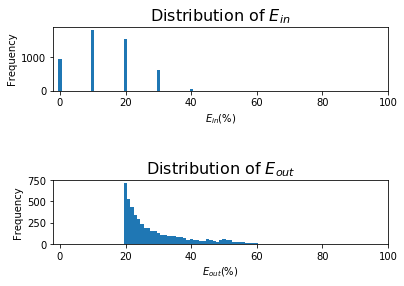

In [2]:
size = 10
ld = 0.8        #lambda
repeat = 5000
Ein = np.zeros((repeat))
Eout = np.zeros((repeat))
for j in range(repeat):  
    # generate x & y 
    x = np.sort(np.random.uniform(-1,1,size))
    y = np.sign(x)*np.where(np.random.random(size)<(1-ld),-1,1)
    
    # get theta
    c = np.r_[-1,x,1]
    thetas = [(c[i] + c[i+1]) / 2 for i in range(size+1)]  
    
    # decision stump
    best = (0, 0, size)    # best = (s, theta_t, Ein[j])
    for theta in thetas:
        yp = np.where(x > theta, 1, -1)
        err_yp = np.sum(yp != y)
        err_yn = size - err_yp
        if best[2] > err_yn:
            best = (-1, theta, err_yn)
        if best[2] > err_yp:
            best = (1, theta, err_yp)
    Ein[j]  = best[2]
    Eout[j] = 0.5 + 0.3*best[0]*(np.abs(best[1])-1)
Ein, Eout = Ein/size*100, Eout*100

print("average Ein =", np.average(Ein), "%")
print("average Eout =", np.around(np.average(Eout), decimals=2), "%")

#plot
plt.subplot(311)
hist, bin_edges = np.histogram(Ein, bins = range(-2, 101))
plt.bar(bin_edges[:-1], hist, width = 1.0, align="center")
plt.xlim(min(bin_edges), max(bin_edges))
plt.xlabel(r"$E_{in}(\%) $")
plt.ylabel("Frequency")
plt.title("Distribution of "+r'$ E_{in}$', fontsize=16)

plt.subplot(313)
hist, bin_edges = np.histogram(Eout, bins = range(-2, 101))
plt.bar(bin_edges[:-1], hist, width = 1.0, align="center")
plt.xlim(min(bin_edges), max(bin_edges))
plt.xlabel(r"$E_{out}(\%) $")
plt.ylabel("Frequency")
plt.title("Distribution of "+r'$ E_{out}$', fontsize=16)

plt.show()   

Decision stumps can also work for multi-dimensional data. In particular, each decision stump now deals with a specific dimension $i$, as shown below. 

$$h_{s,i,\theta}(x) = s \bullet sign(x_i-\theta)$$

Implement the following decision stump algorithm for multi-dimensional data: 
1. for each dimension $i = 1,2,...,d$, find the best decision stump h_{s,i,\theta} using the one-dimensional decision stump algorithm that you have just implemented. 
2. return the "best of best" decision stump in terms of $E_{in}$. If there is a tie, please randomly choose among the lowest-$E_{in}$ ones. 

The training data $D_{train}$ is available at [hw2_train.dat](http://www.csie.ntu.edu.tw/~htlin/course/mlfound16fall/hw2/hw2_train.dat)

The testing data $D_{test}$ is available at [hw2_test.dat](http://www.csie.ntu.edu.tw/~htlin/course/mlfound16fall/hw2/hw2_test.dat)

<ol start="19">
  <li>Run the algorithm on the $D_{train}$. What is the optimal decision stump returned by your program? What is the $E_{in}$ of the optimal decision stump?
    </li><br />
    <li>Use the returned decision stump to predict the label of each example within the $D_{test}$. Report an estimate of $E_{out}$ by $D_{test}$. 
    </li>
</ol>

In [3]:
train = np.loadtxt("hw2_train.dat")
test = np.loadtxt("hw2_test.dat")
xtr, ytr = train[:,:-1], train[:,-1]
xte, yte = test[:,:-1], test[:,-1]
dim = len(xtr[0])
size_tr = len(xtr)
size_te = len(xte)

#best = (best_Ein, best_index, best_s, best_theta)
best = (size_tr, 0, 0, 0)

Xs_tr = np.sort(xtr,axis=0).T
Ys_tr = ytr[np.argsort(xtr,axis=0)].T
thetas = (np.concatenate([-1+Xs_tr[:,0:1], Xs_tr],axis=1) + np.concatenate([Xs_tr, 1+Xs_tr[:,-2:-1]],axis=1)) / 2
for i in range(dim):    
    for theta in thetas[i]:
        yp = np.where(Xs_tr[i] >  theta, 1, -1)
        err_yp = np.sum(yp!=Ys_tr[i])
        err_yn = size_tr - err_yp
        if best[0] > err_yn:
            best = (err_yn, i, -1, theta)
        if best[0] > err_yp:
            best = (err_yp, i, 1, theta)
Ein = best[0]/size_tr*100
print("The index of the dimension where the optimal decision stump generated is",best[1])
print("Ein =",Ein,"% , s =", best[2], ", theta =", np.around(best[3],decimals=4)) 


#Eout
Xs_te = np.sort(xte,axis=0).T
Ys_te = yte[np.argsort(xte,axis=0)].T
 
if best[2] == 1:
    yprev = np.where(Xs_te[best[1]] >  best[3], 1, -1)
elif best[2] == -1:
    yprev = np.where(Xs_te[best[1]] <=  best[3], 1, -1)
Eout = np.sum(yprev != Ys_te[best[1]])/size_te*100

print("Eout=",Eout,"%")

The index of the dimension where the optimal decision stump generated is 3
Ein = 25.0 % , s = -1 , theta = 1.6175
Eout= 35.5 %
